In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg
import graphviz 
import pickle

############################
from sklearn import preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,VotingClassifier,RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_predict, KFold, train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
#from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree._export import plot_tree


In [ ]:
df_Nacional = pd.read_csv('../microdadosEnem_Nacional_Amostragem.csv', sep = ';', encoding='ISO 8859-1')
df_Nacional = df_Nacional.loc[:, ~df_Nacional.columns.str.contains('^Unnamed')]
df_Alagoas = pd.read_csv('../microdadosEnemAlagoas.csv', sep = ';', encoding='ISO 8859-1')
df_Alagoas = df_Alagoas.loc[:, ~df_Alagoas.columns.str.contains('^Unnamed')]
#df_Alagoas.head(5)

In [ ]:
# feature-cols vai armazenar todas as colunas exceto a coluna que armazena as
# notas de matemática do participante de Alagoas
feature_cols = [x for x in df_Alagoas.columns if x != 'NU_NOTA_REDACAO']
X = df_Alagoas[feature_cols]
Y = df_Alagoas['NU_NOTA_REDACAO']

In [ ]:
# feature-cols vai armazenar todas as colunas exceto a coluna que armazena as
# notas de matemática do participante de Alagoas
feature_cols = [x for x in df_Nacional.columns if x != 'NU_NOTA_REDACAO']
X2 = df_Nacional[feature_cols]
Y2 = df_Nacional['NU_NOTA_REDACAO']

In [47]:
# Leitura dos datasets de treino e teste e criação do df de resposta
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=0)
#test-size = 0.3 define que o tamanho da base de teste é de 30% da base principal, e a base de treino é 70%

#visualizando os tamanhos da bases, teino e teste
print(X.shape, Y.shape, X_train.shape, y_train.shape ,X_test.shape, y_test.shape)

(64605, 40) (64605,) (45223, 40) (45223,) (19382, 40) (19382,)


In [48]:
# Leitura dos datasets de treino e teste e criação do df de resposta
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, Y2, test_size=0.3, random_state=0)
#test-size = 0.3 define que o tamanho da base de teste é de 30% da base principal, e a base de treino é 70%

In [53]:
numeric_features = ['NU_IDADE', 'TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA','TP_ANO_CONCLUIU', 'TP_ESCOLA',
                    'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',  'Q005']


categorical_features = ['Q001', 'Q002', 'Q003', 'Q004','Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011','Q012', 'Q013', 'Q014',
                        'Q015','Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027']

X_train = X_train[numeric_features + categorical_features]
X_test = X_test[numeric_features + categorical_features]
X_train2 = X_train[numeric_features + categorical_features]
X_test2 = X_test[numeric_features + categorical_features]

feature_names= numeric_features + categorical_features
len(feature_names)
print(feature_names)

['NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q005', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027']


In [9]:
l1 = []
l2 = []

In [11]:

#pickle.dump(clf, open('modelo.sav', 'wb'))


In [49]:
rf    = pickle.load(open('RandomForest_AL.sav', 'rb'))
rl    = pickle.load(open('RegressãoLinear_AL.sav', 'rb'))
rn    = pickle.load(open('RedeNeural_AL.sav', 'rb'))
dt    = pickle.load(open('ArvoredeDecisao_AL.sav', 'rb'))

In [27]:
modelos = ['Random  Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de Decisão']

In [62]:
#https://docs.python.org/3/library/pickle.html
#salvar em disco o modelo treinado
for i, j, k in zip(l1, l2, modelos):
    pickle.dump(i, open(k +'_AL.sav', 'wb'))
    pickle.dump(j, open(k +'_BR.sav', 'wb'))

In [40]:
def aplicaPI(reg, X_test, y_test ):
    result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    return result

<BarContainer object of 38 artists>

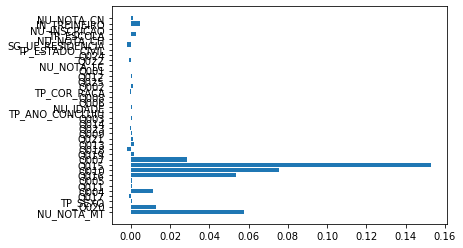

In [24]:
#Para carregar o modelo treinado vamos usar o método load(), veja.
rfPI = pickle.load(open('rfPI_AL.sav', 'rb'))
rfPI.importances_mean.argsort()
sorted_idx = rfPI.importances_mean.argsort()
fig, ax = plt.subplots()
ax.barh(X_test.columns[sorted_idx], rfPI.importances_mean)
#X_test.columns[1]

In [22]:
nomes=['rf', 'rl','rn', 'dtree']
for i, j, k in zip(l1, l2, nomes):
    pickle.dump(aplicaPI(i, X_test, y_test ), open(k +'PI_AL.sav', 'wb'))
    pickle.dump(aplicaPI(j, X_test, y_test ), open(k +'PI_BR.sav', 'wb'))

NameError: name 'l1' is not defined

In [58]:
rfPI    = pickle.load(open('rfPI_AL.sav', 'rb'))
rlPI    = pickle.load(open('rlPI_AL.sav', 'rb'))
rnPI    = pickle.load(open('rnPI_AL.sav', 'rb'))
dtreePI = pickle.load(open('dtreePI_AL.sav', 'rb'))

In [59]:
rfPI2    = pickle.load(open('rfPI_BR.sav', 'rb'))
rlPI2    = pickle.load(open('rlPI_BR.sav', 'rb'))
rnPI2    = pickle.load(open('rnPI_BR.sav', 'rb'))
dtreePI2 = pickle.load(open('dtreePI_BR.sav', 'rb'))

In [157]:
rfPI.importances_std

array([3.10389200e-03, 1.49901257e-03, 4.14070428e-04, 6.77400507e-04,
       1.59562724e-03, 4.72404209e-04, 2.81755332e-04, 2.14680754e-03,
       3.46216010e-03, 5.85885921e-03, 2.17698829e-03, 5.54571858e-04,
       8.93540541e-04, 8.70248314e-04, 1.56741571e-03, 7.92513426e-04,
       1.05277018e-03, 3.78173998e-04, 6.36430737e-04, 9.14398408e-04,
       6.72094916e-04, 6.36742927e-04, 1.75457717e-04, 3.97697263e-04,
       3.47771860e-04, 3.32927951e-04, 3.14372533e-04, 7.33656021e-05,
       3.40710246e-04, 5.62156592e-04, 8.10794399e-04, 4.40632576e-04,
       9.72355910e-04, 3.27464091e-04, 1.16948834e-03, 4.85286487e-04,
       1.22995335e-03, 7.37143478e-04])

In [76]:
rfPI.importances_mean 
sorted_idx = rfPI.importances_mean.argsort()
dfPIrf = pd.DataFrame()
dfPIrf['features'] = X_test.columns[sorted_idx]
dfPIrf['importances_mean'] = rfPI.importances_mean[sorted_idx]
print(rfPI.importances_mean , rfPI.importances_mean[sorted_idx], X_test.columns[sorted_idx])
dfPIrf.sort_values(by=['importances_mean'], inplace=True, ascending=False)

[ 5.74829686e-02  1.30417832e-02  6.16753141e-04 -9.58575767e-04
  1.13196039e-02  8.19883292e-04  5.93009514e-04  5.38052045e-02
  7.57678106e-02  1.53128414e-01  2.86235669e-02  1.63954826e-03
 -1.97582243e-03  1.46459214e-03  1.01919680e-03  5.83957440e-04
 -4.97892941e-04 -8.74187122e-05  6.43152306e-04 -1.45168960e-05
  7.12848781e-04  2.22354199e-04 -5.74230720e-05 -4.40766296e-04
  1.19232331e-03  4.89300267e-05  3.81233185e-04 -1.54848941e-05
 -8.16113388e-05 -7.75395355e-04  7.74275454e-07 -1.10587937e-05
 -1.73415070e-03  4.94835199e-05  2.77547431e-03  3.52513654e-04
  4.58423651e-03  1.08321812e-03] [-1.97582243e-03 -1.73415070e-03 -9.58575767e-04 -7.75395355e-04
 -4.97892941e-04 -4.40766296e-04 -8.74187122e-05 -8.16113388e-05
 -5.74230720e-05 -1.54848941e-05 -1.45168960e-05 -1.10587937e-05
  7.74275454e-07  4.89300267e-05  4.94835199e-05  2.22354199e-04
  3.52513654e-04  3.81233185e-04  5.83957440e-04  5.93009514e-04
  6.16753141e-04  6.43152306e-04  7.12848781e-04  8.1988

In [78]:
rlPI.importances_mean 
sorted_idx = rlPI.importances_mean.argsort()
dfPIrl = pd.DataFrame()
dfPIrl['features'] = X_test.columns[sorted_idx]
dfPIrl['importances_mean'] = rlPI.importances_mean[sorted_idx]
dfPIrl.sort_values(by=['importances_mean'], inplace=True, ascending=False)
#print(rfPI.importances_mean , rfPI.importances_mean.argsort(), X_test.columns[sorted_idx])

In [80]:
rnPI.importances_mean 
sorted_idx = rnPI.importances_mean.argsort()
dfPIrn = pd.DataFrame()
dfPIrn['features'] = X_test.columns[sorted_idx]
dfPIrn['importances_mean'] = rnPI.importances_mean[sorted_idx]
dfPIrn.sort_values(by=['importances_mean'], inplace=True, ascending=False)
#print(rfPI.importances_mean , rfPI.importances_mean.argsort(), X_test.columns[sorted_idx])

In [109]:
dtreePI.importances_mean 
sorted_idx = dtreePI.importances_mean.argsort()
dfPIdtree = pd.DataFrame()
dfPIdtree['features'] = X_test.columns[sorted_idx]
dfPIdtree['importances_mean'] = dtreePI.importances_mean[sorted_idx]
dfPIdtree.sort_values(by=['importances_mean'], inplace=True, ascending=False)
#print(rfPI.importances_mean , rfPI.importances_mean.argsort(), X_test.columns[sorted_idx])

In [251]:
dfPIrf.rename(columns={"importances_mean": "importances_mean_RF"}, inplace=True)
dfPIrn.rename(columns={"importances_mean": "importances_mean_RN"},inplace=True)
dfPIrl.rename(columns={"importances_mean": "importances_mean_RL"}, inplace=True)
dfPIdtree.rename(columns={"importances_mean": "importances_mean_Dtree"}, inplace=True)

In [268]:
dfPIrf.sort_index(ascending=False, inplace=True)
dfPIrl.sort_index(ascending=False, inplace=True)

,features,importances_mean_RL
37,NU_NOTA_LC,0.125968
36,NU_IDADE,0.101247
35,NU_NOTA_CH,0.069090
34,Q026,0.042008
33,NU_NOTA_CN,0.034067
32,NU_NOTA_MT,0.022614
31,TP_SEXO,0.019245
30,TP_ANO_CONCLUIU,0.017269
29,TP_ESCOLA,0.010602
28,Q027,0.009664


In [257]:
df = pd.DataFrame()

In [264]:

 pd.concat([dfPIrf, dfPIrl])


,features,importances_mean_RF,importances_mean_RL
37,NU_NOTA_LC,0.153128,NaN
36,NU_NOTA_CH,0.075768,NaN
35,NU_IDADE,0.057483,NaN
34,NU_NOTA_CN,0.053805,NaN
33,NU_NOTA_MT,0.028624,NaN
...,...,...,...
4,Q018,NaN,-0.000055
3,Q015,NaN,-0.000105
2,TP_ESTADO_CIVIL,NaN,-0.000151
1,Q004,NaN,-0.000293


In [86]:
estimadores=  ['rf','rl', 'rn', 'dtree']

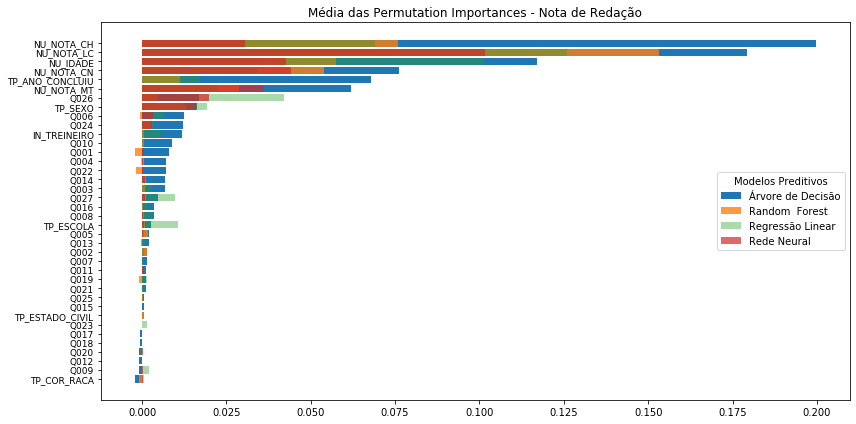

In [273]:
#labels  = [ 'Max_Error', 'MAE', 'R²', 'MSE', 'Tempo (min)']
#colunas = ['Max_Error', 'MAE', 'R²', 'MSE', 'Tempo de processamento min']
modelos = ['Random  Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de Decisão']
width = 0.35  # the width of the bars
x = np.arange(len(dfPIdtree['features']))  # the label locations

#for label in zip(dfPIdtree['features']):
fig, ax = plt.subplots(figsize=(12, 6))
    
ax.barh(dfPIdtree['features'], dfPIdtree['importances_mean_Dtree'],  label='Árvore de Decisão', alpha = 1 )
ax.barh(dfPIrf['features'],dfPIrf['importances_mean_RF'],  label='Random  Forest',alpha = 0.8 )
ax.barh(dfPIrl['features'],dfPIrl['importances_mean_RL'],  label='Regressão Linear',alpha = 0.4 )
ax.barh(dfPIrn['features'],dfPIrn['importances_mean_RN'],  label='Rede Neural',alpha = 0.7 )
#xerr = dtreePI.importances_std xerr=rfPI.importances_std xerr= rlPI.importances_std xerr= rnPI.importances_std
    


#x.set_xticklabels(dfPIdtree['features'])
ax.invert_yaxis() 

ax.legend(title="Modelos Preditivos",loc="center right", fontsize = 10,)  
ax.set_title('Média das Permutation Importances - Nota de Redação')
plt.setp(ax.get_yticklabels(), fontsize=9)
fig.tight_layout()
plt.savefig('imagens/mean_importancesRD.png', format='png')
plt.show()

In [169]:

results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

print(list(results.keys()))
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
data

['Question 1', 'Question 2', 'Question 3', 'Question 4', 'Question 5', 'Question 6']


array([[10, 15, 17, 32, 26],
       [26, 22, 29, 10, 13],
       [35, 37,  7,  2, 19],
       [32, 11,  9, 15, 33],
       [21, 29,  5,  5, 40],
       [ 8, 19,  5, 30, 38]])

In [210]:
a = pd.Series(dfPIrf['importances_mean']).array

    


TypeError: _append_dispatcher() missing 1 required positional argument: 'values'

In [195]:
dfPIrf['importances_mean'].T.array

<PandasArray>
[    0.15312841409196215,     0.07576781062226724,     0.05748296860142131,
     0.05380520447464299,     0.02862356688451666,    0.013041783202614643,
     0.01131960394539443,    0.004584236505863681,   0.0027754743111261027,
   0.0016395482609792955,   0.0014645921430164854,   0.0011923233148238843,
    0.001083218124983787,   0.0010191967993038787,   0.0008198832916437859,
   0.0007128487812742446,   0.0006431523055633548,   0.0006167531410391502,
   0.0005930095137747671,   0.0005839574403779357,  0.00038123318476902536,
  0.00035251365385265967,   0.0002223541985909905,   4.948351991677091e-05,
   4.893002674080105e-05,   7.742754539519226e-07, -1.1058793655960298e-05,
 -1.4516896020944081e-05, -1.5484894086448266e-05, -5.7423072029905155e-05,
  -8.161133881229299e-05,  -8.741871221310538e-05,   -0.000440766295784234,
  -0.0004978929414687583,  -0.0007753953551363879,  -0.0009585757667017414,
  -0.0017341506996240929,   -0.001975822425048901]
Length: 38, dtype: floa

In [239]:
#d = np.append(dfPIrf['importances_mean'] dfPIrl['importances_mean'])
l=[]


l2  = dfPIrl['importances_mean'].to_numpy(copy = True)

l3 = dfPIrf['importances_mean'].to_numpy(copy=True)

[dfPIrf['importances_mean'],dfPIrl['importances_mean']] .array

AttributeError: 'list' object has no attribute 'array'

In [242]:
d = np.array([dfPIrf['importances_mean'],dfPIrl['importances_mean'],dfPIrn['importances_mean'].array, dfPIdtree['importances_mean'].array])

In [244]:
d.

(4, 38)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Random  Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de Decisão']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = dfPIdtree['features']
    # list(results.keys())
    data = np.array(dfPIrf['importances_mean'].array,dfPIrl['importances_mean'].array, dfPIrn['importances_mean'],dfPIdtree['importances_mean'])
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

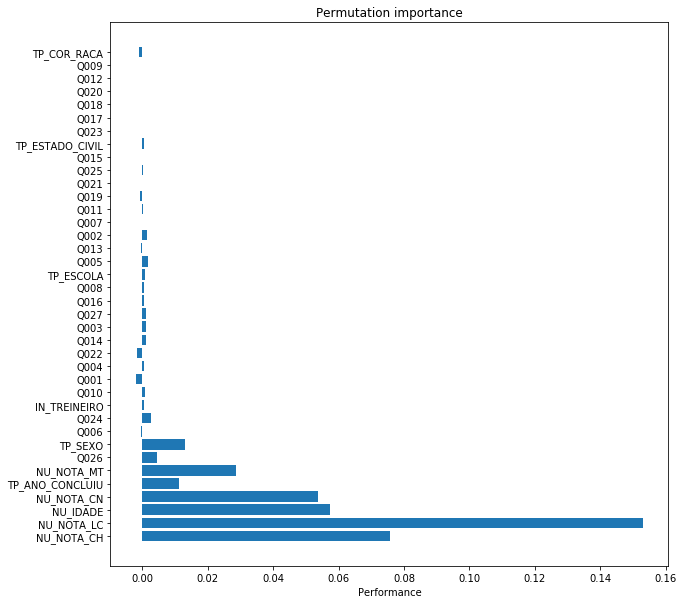

In [92]:
PI=pd.DataFrame()
#r1.importances_mean[i1]

fig, ax = plt.subplots(figsize=(10, 10))
#y_pos = i1
#per = r1.importances_mean[i1]
ax.barh(X_test.columns[sorted_idx], rfPI.importances_mean[sorted_idx], align='center')
#ax.set_yticks(y_pos)
#ax.set_yticklabels(X_test.columns[i1])
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Permutation importance')
ax.invert_yaxis() 
plt.show()


In [18]:

df_imprimirImportância = pd.DataFrame()


#modelo.predict(X[0:1])
#modelo.importances_mean
#modelo
sorted_idx = rfPI.importances_mean.argsort()
sorted_idx
df_imprimirImportância['feature'] = X_test.columns[sorted_idx]
df_imprimirImportância['importancia'] = rfPI.importances_mean 
X_test.columns[sorted_idx]
for i in sorted_idx:
    print(X_test.columns[i], rfPI.importances_mean[i] )


NU_NOTA_MT -0.001975822425048901
Q020 -0.0017341506996240929
TP_SEXO -0.0009585757667017414
Q017 -0.0007753953551363879
Q004 -0.0004978929414687583
Q011 -0.000440766295784234
Q005 -8.741871221310538e-05
Q016 -8.161133881229299e-05
Q010 -5.7423072029905155e-05
Q015 -1.5484894086448266e-05
Q007 -1.4516896020944081e-05
Q019 -1.1058793655960298e-05
Q018 7.742754539519226e-07
Q013 4.893002674080105e-05
Q021 4.948351991677091e-05
Q009 0.0002223541985909905
Q023 0.00035251365385265967
Q014 0.00038123318476902536
Q003 0.0005839574403779357
TP_ANO_CONCLUIU 0.0005930095137747671
NU_IDADE 0.0006167531410391502
Q006 0.0006431523055633548
Q008 0.0007128487812742446
TP_COR_RACA 0.0008198832916437859
Q002 0.0010191967993038787
Q025 0.001083218124983787
Q012 0.0011923233148238843
Q001 0.0014645921430164854
NU_NOTA_LC 0.0016395482609792955
Q022 0.0027754743111261027
Q024 0.004584236505863681
TP_ESTADO_CIVIL 0.01131960394539443
SG_UF_RESIDENCIA 0.013041783202614643
NU_NOTA_CH 0.02862356688451666
TP_ESCO

In [105]:

df_imprimirImportância.sort_values(by=['importancia'],ascending=False)

,feature,importancia
9,Q017,1.531284e-01
8,Q012,7.576781e-02
0,Q001,5.748297e-02
7,Q018,5.380520e-02
10,Q009,2.862357e-02
1,Q022,1.304178e-02
4,Q006,1.131960e-02
36,NU_NOTA_CH,4.584237e-03
34,NU_NOTA_CN,2.775474e-03
11,Q021,1.639548e-03


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
X = [[1, 9, 9],[1, 9, 9],[1, 9, 9],
     [0, 9, 9],[0, 9, 9],[0, 9, 9]]
y = [1, 1, 1, 0, 0, 0]
clf = LogisticRegression().fit(X, y)
result = permutation_importance(clf, X, y, n_repeats=10,
                                random_state=0)
result.importances_mean

 #result.importances_std


array([0.46666667, 0.        , 0.        ])

[0.46666667 0.         0.        ] [0.22110832 0.         0.        ]


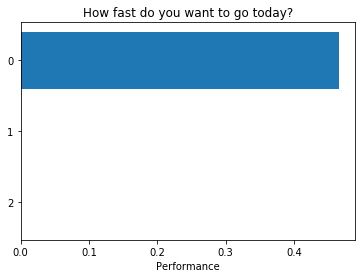

In [22]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()


In [50]:

    r1,i1 = aplicaPI(rf, X_test, y_test )
    r2, i2 = aplicaPI(rf2, X2_test, y2_test )
    

C:\Users\aleon\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


ValueError: too many values to unpack (expected 2)

In [73]:
X_test.columns[i1]

for i in i1:
    print(r1.importances_mean[i], X_test.columns[i])

-0.001975822425048901 Q001
-0.0017341506996240929 Q022
-0.0009585757667017414 TP_COR_RACA
-0.0007753953551363879 Q019
-0.0004978929414687583 Q006
-0.000440766295784234 Q013
-8.741871221310538e-05 Q007
-8.161133881229299e-05 Q018
-5.7423072029905155e-05 Q012
-1.5484894086448266e-05 Q017
-1.4516896020944081e-05 Q009
-1.1058793655960298e-05 Q021
7.742754539519226e-07 Q020
4.893002674080105e-05 Q015
4.948351991677091e-05 Q023
0.0002223541985909905 Q011
0.00035251365385265967 Q025
0.00038123318476902536 Q016
0.0005839574403779357 Q004
0.0005930095137747671 IN_TREINEIRO
0.0006167531410391502 TP_ESTADO_CIVIL
0.0006431523055633548 Q008
0.0007128487812742446 Q010
0.0008198832916437859 TP_ESCOLA
0.0010191967993038787 Q003
0.001083218124983787 Q027
0.0011923233148238843 Q014
0.0014645921430164854 Q002
0.0016395482609792955 Q005
0.0027754743111261027 Q024
0.004584236505863681 Q026
0.01131960394539443 TP_ANO_CONCLUIU
0.013041783202614643 TP_SEXO
0.02862356688451666 NU_NOTA_MT
0.05380520447464299 NU

In [118]:
y_pos = np.arange(len(X_test.columns[i1]))
y_pos = i1
y_pos
w= r1.importances_mean[i1]
i1
w.argsort()



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

ValueError: too many values to unpack (expected 2)

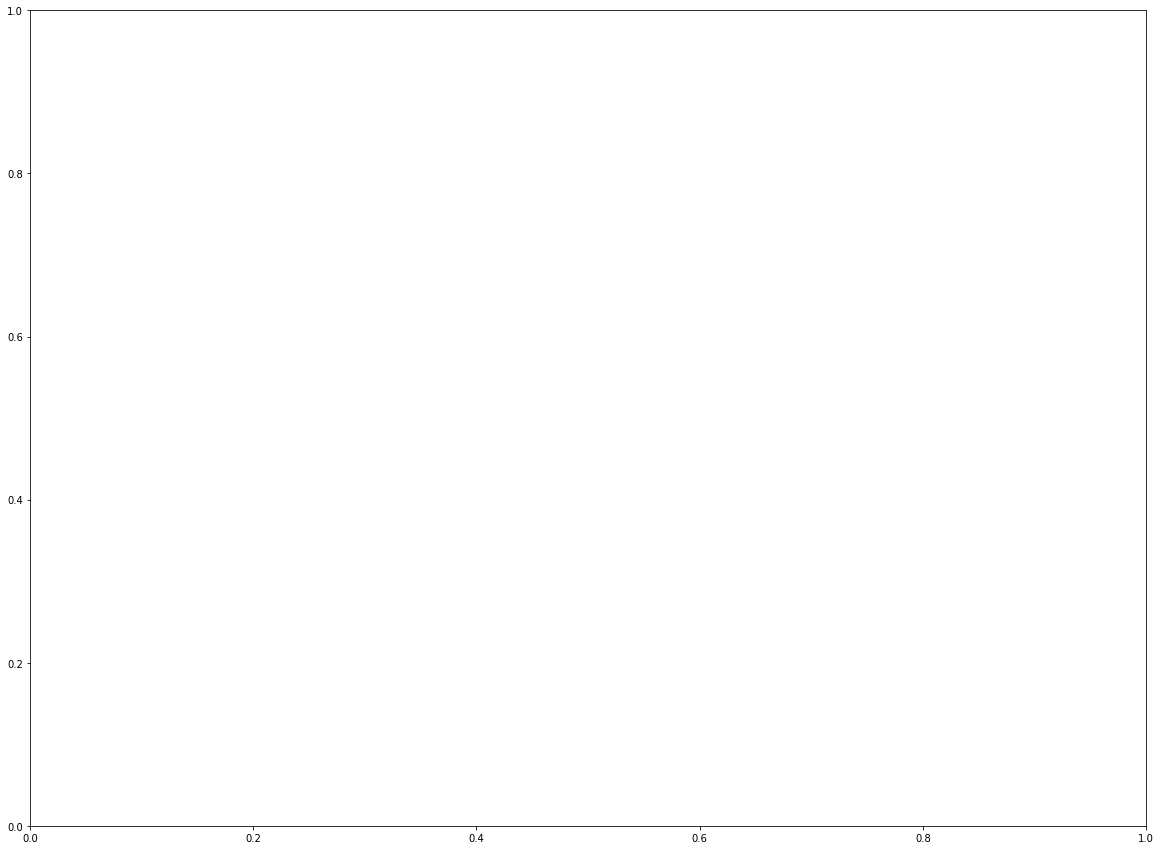

In [67]:
fig, ax = plt.subplots(figsize=(20, 15))
(result, sorted_idx) = aplicaPI(rf, X_test, y_test )
    
ax.barh(result.importances_mean[sorted_idx].T,  labels=X_test.columns[sorted_idx])
ax.title("Permutation Importance - Notas Matemática - AL - "+ label, fontsize=15)
plt.show()

In [71]:
PI=pd.DataFrame()
def aplicaPI(reg, X_test, y_test ):
    result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    sorted_idx = result.importances_mean.argsort()
    return (result, sorted_idx)

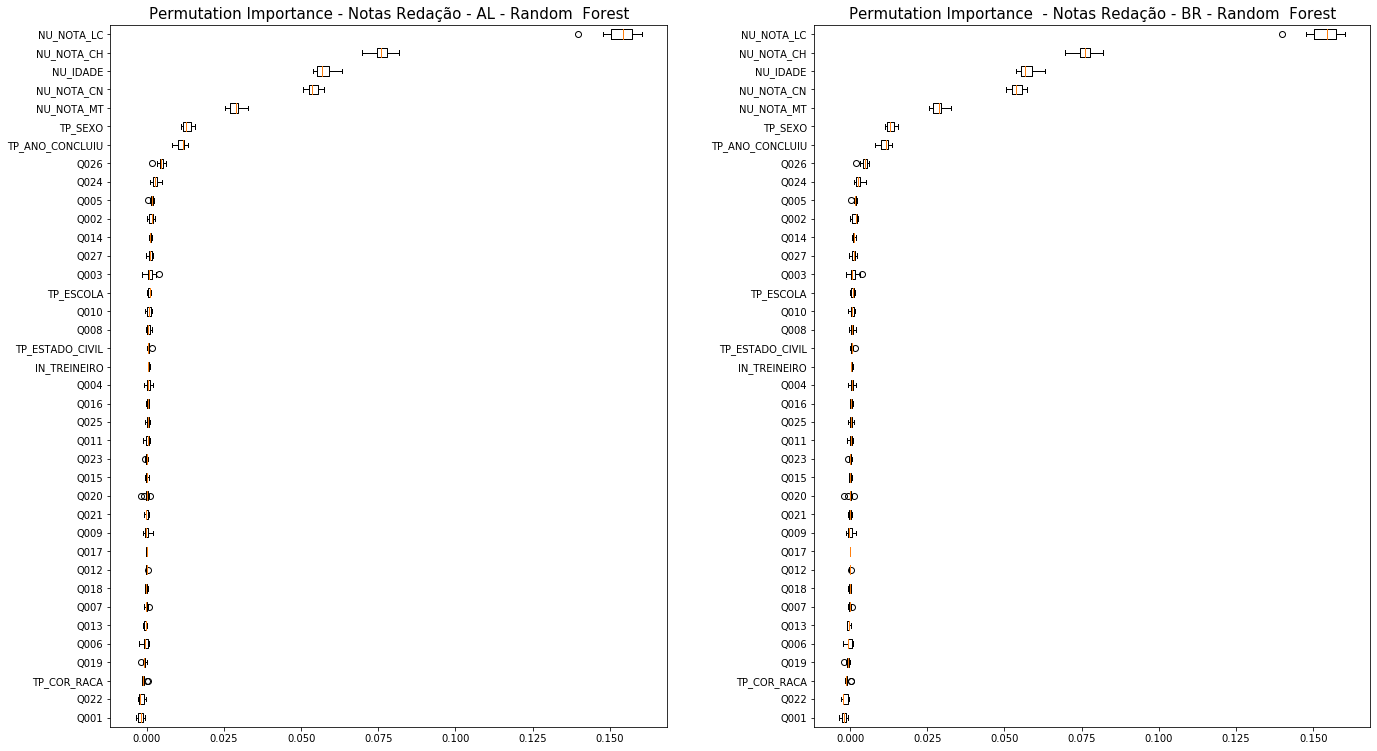

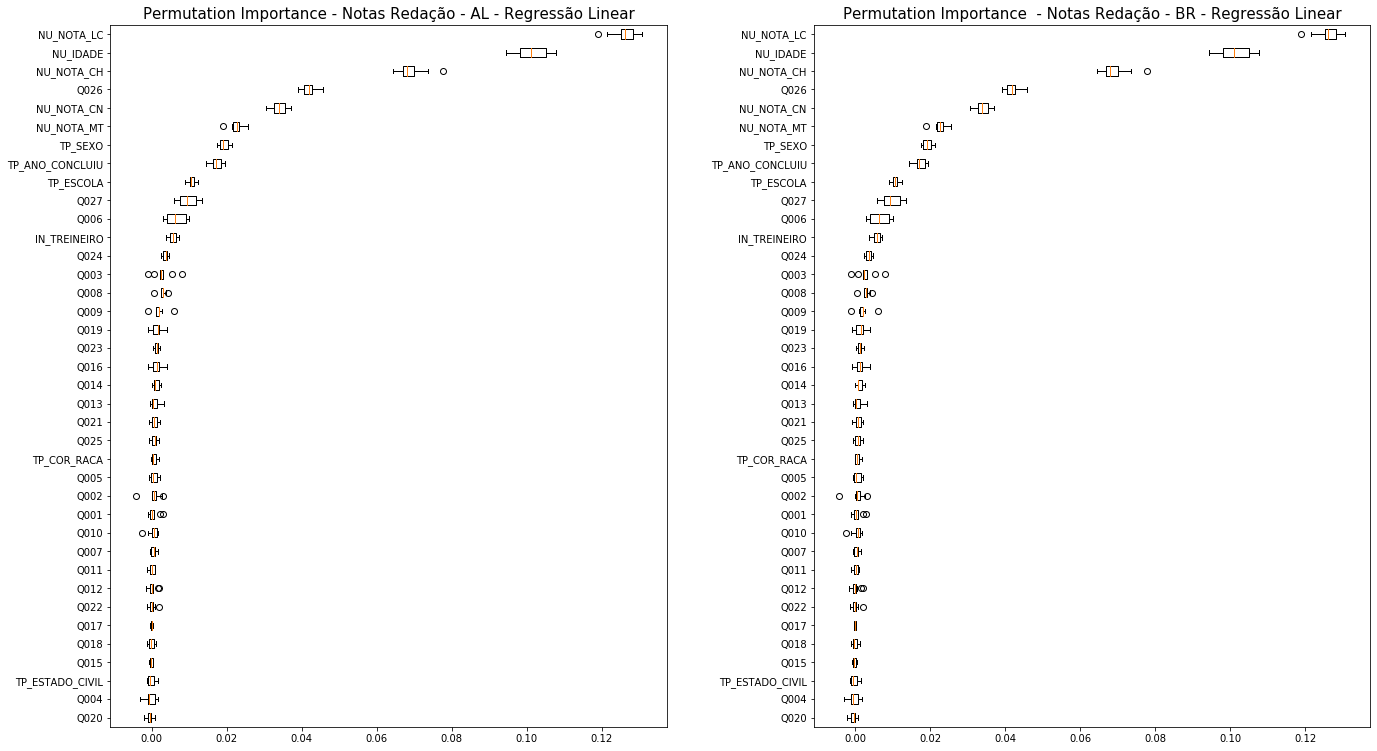

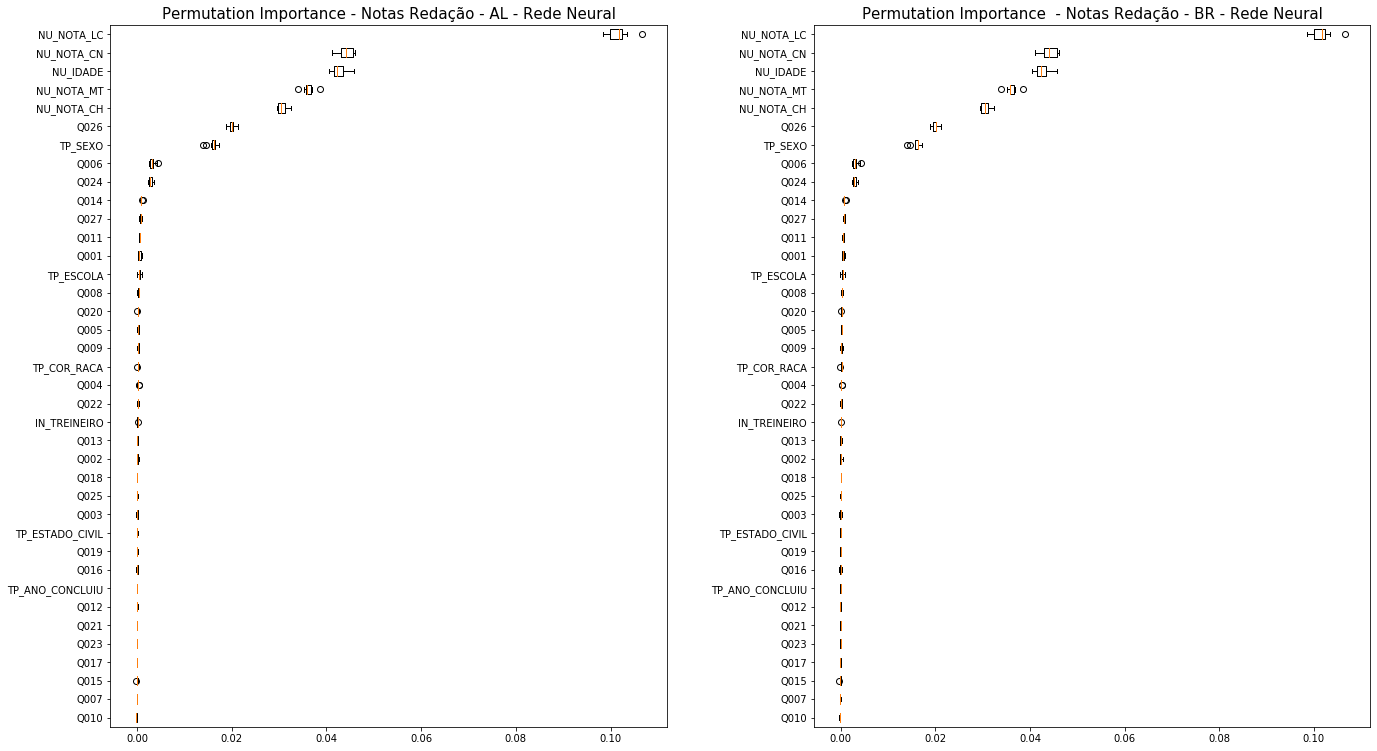

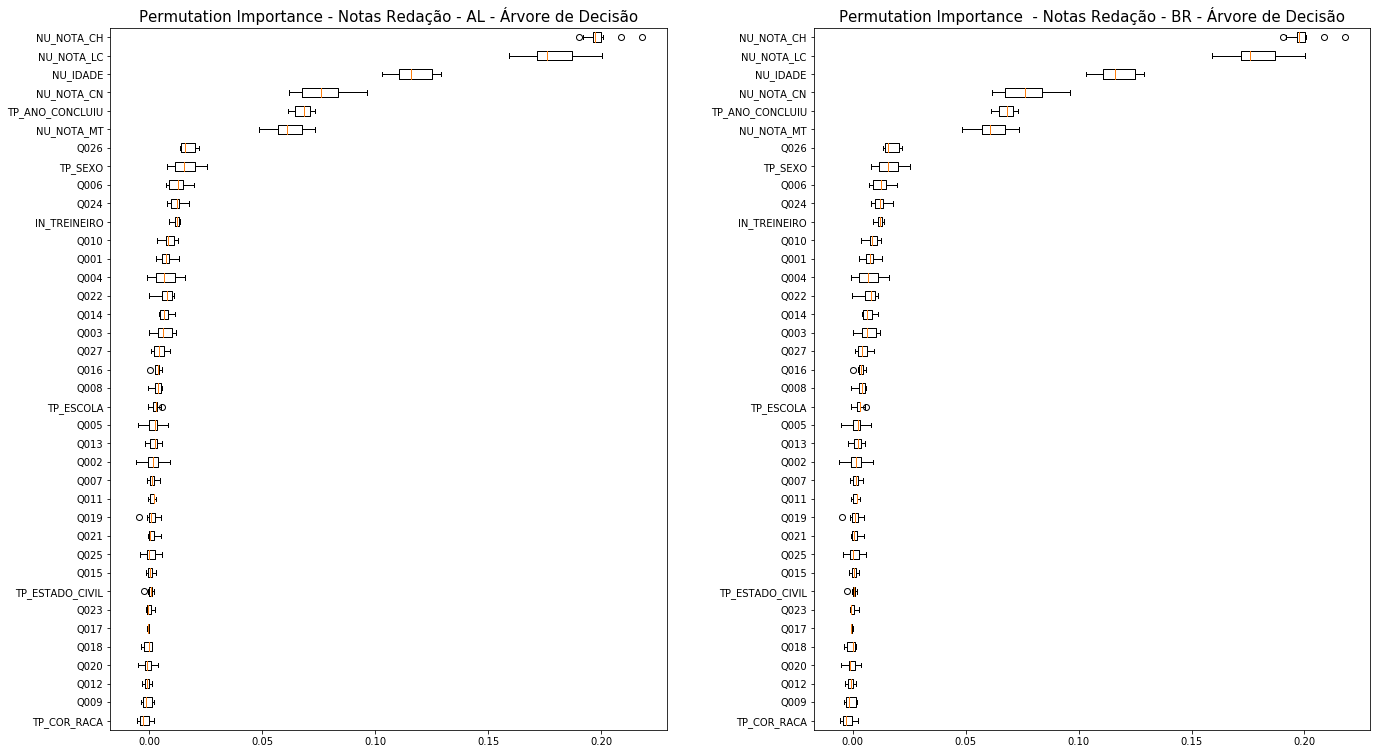

In [72]:

for label, reg1, reg2 in zip(modelos, l1, l2):

    fig = plt.figure(figsize=(20, 15))
    ########primeiro plot
    (result, sorted_idx) = aplicaPI(reg1, X_test, y_test )
    plt.subplot(1, 2, 1)
    plt.boxplot(result.importances[sorted_idx].T,
            vert=False,  labels=X_test.columns[sorted_idx])
    plt.title("Permutation Importance - Notas Redação - AL - "+ label, fontsize=15)

    ############ segundo plot
    (result, sorted_idx) = aplicaPI(reg2, X2_test, y2_test )
    plt.subplot(1, 2, 2)
    plt.boxplot(result.importances[sorted_idx].T,
            vert=False,  labels=X_test.columns[sorted_idx])
    plt.title("Permutation Importance  - Notas Redação - BR - " + label, fontsize=15 )

    fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
    plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
    #fig.tight_layout()
   # plt.savefig('imagens/PI_'+label+'_RD.png', format='png')
    plt.show()

In [ ]:
A features com maior permutation inportances para os modelos 
* Random Forest
NU_NOTA_CH
NU_NOTA_LC
NU_NOTA_CN
TP_SEXO
NU_NOTA_REDACAO
NU_IDADE
Q002
Q006
Q007
Q009
* Árvore de Decisão
NU_NOTA_CH
NU_NOTA_CN
NU_NOTA_LC
NU_NOTA_REDACAO
TP_SEXO
NU_IDADE
Q004
Q022
Q003
Q013


* Rgressão Linear
NU_NOTA_CH
NU_NOTA_CN
NU_NOTA_LC
TP_SEXO
NU_IDADE
NU_NOTA_REDACAO
TP_ANO_CONCLUIU
Q006
Q002
TP_ESCOLA

* Rede Neural
NU_NOTA_CN
NU_NOTA_LC
TP_SEXO
NU_NOTA_CH
NU_NOTA_REDACAO
NU_IDADE
Q006
Q002
Q003
Q024

C:\Users\aleon\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


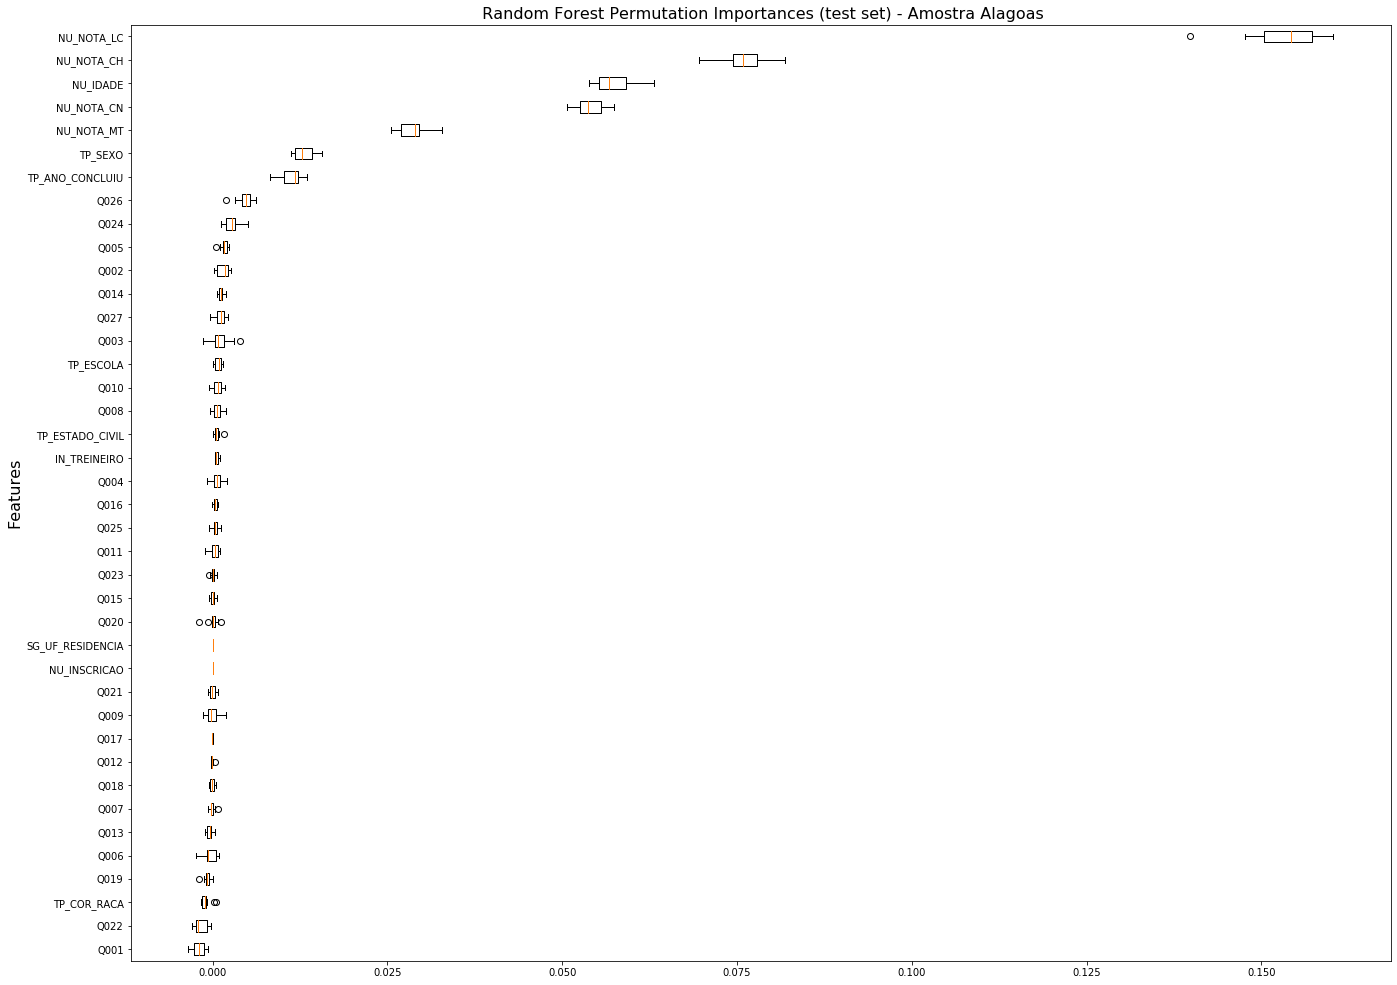

In [28]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Random Forest Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
#plt.savefig('imagens/permutationImportances_RF_MT_AL.png', format='png')

plt.show()

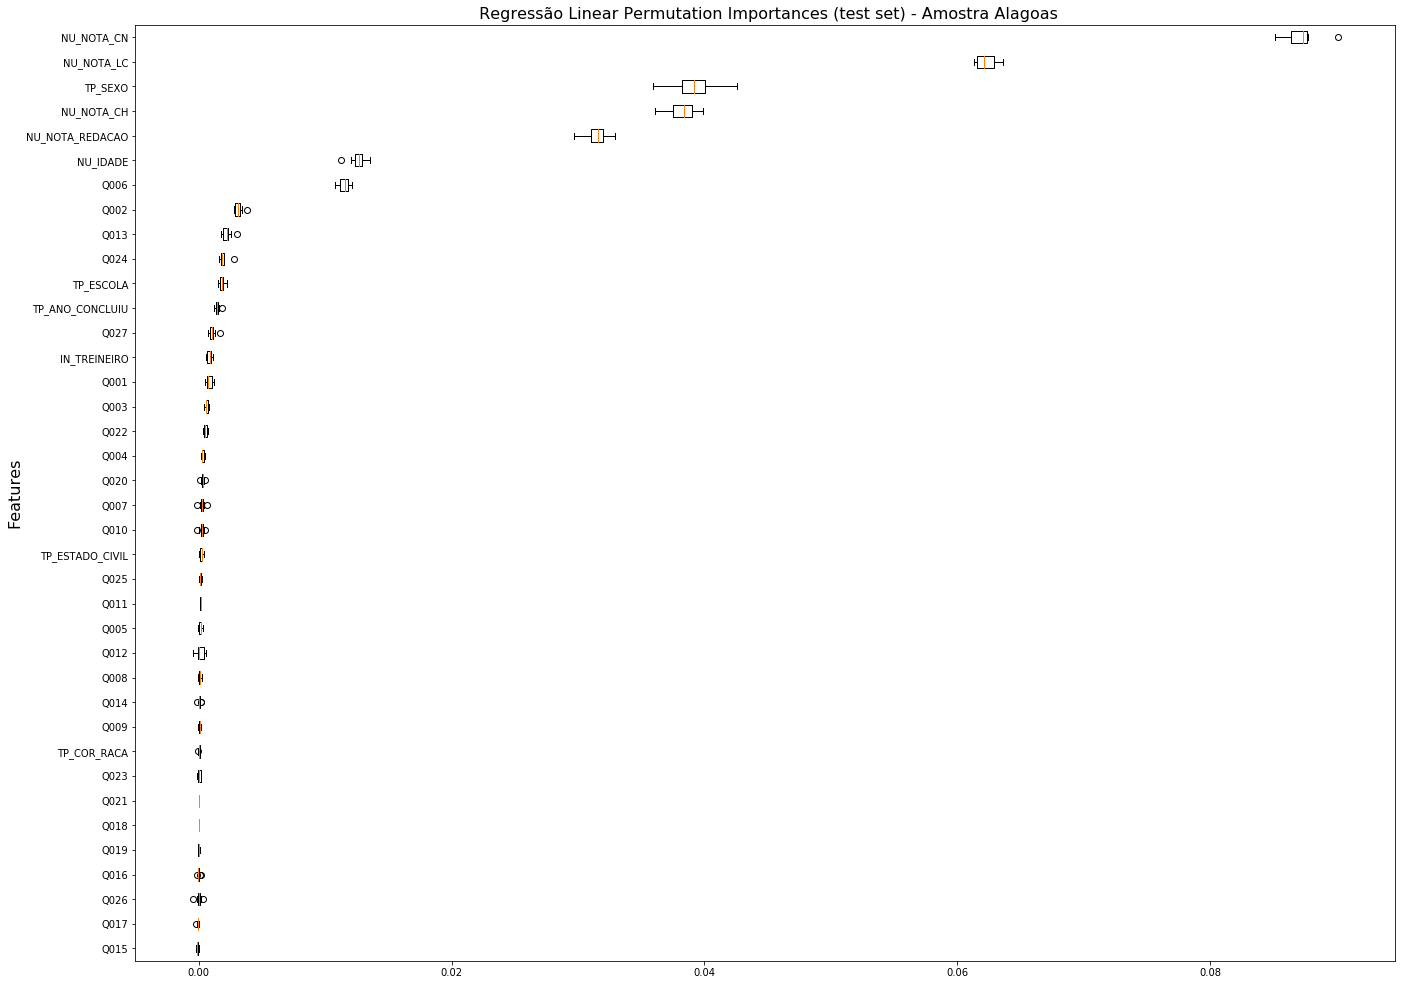

In [15]:
result = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Regressão Linear Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_LR_MT_AL.png', format='png')

plt.show()

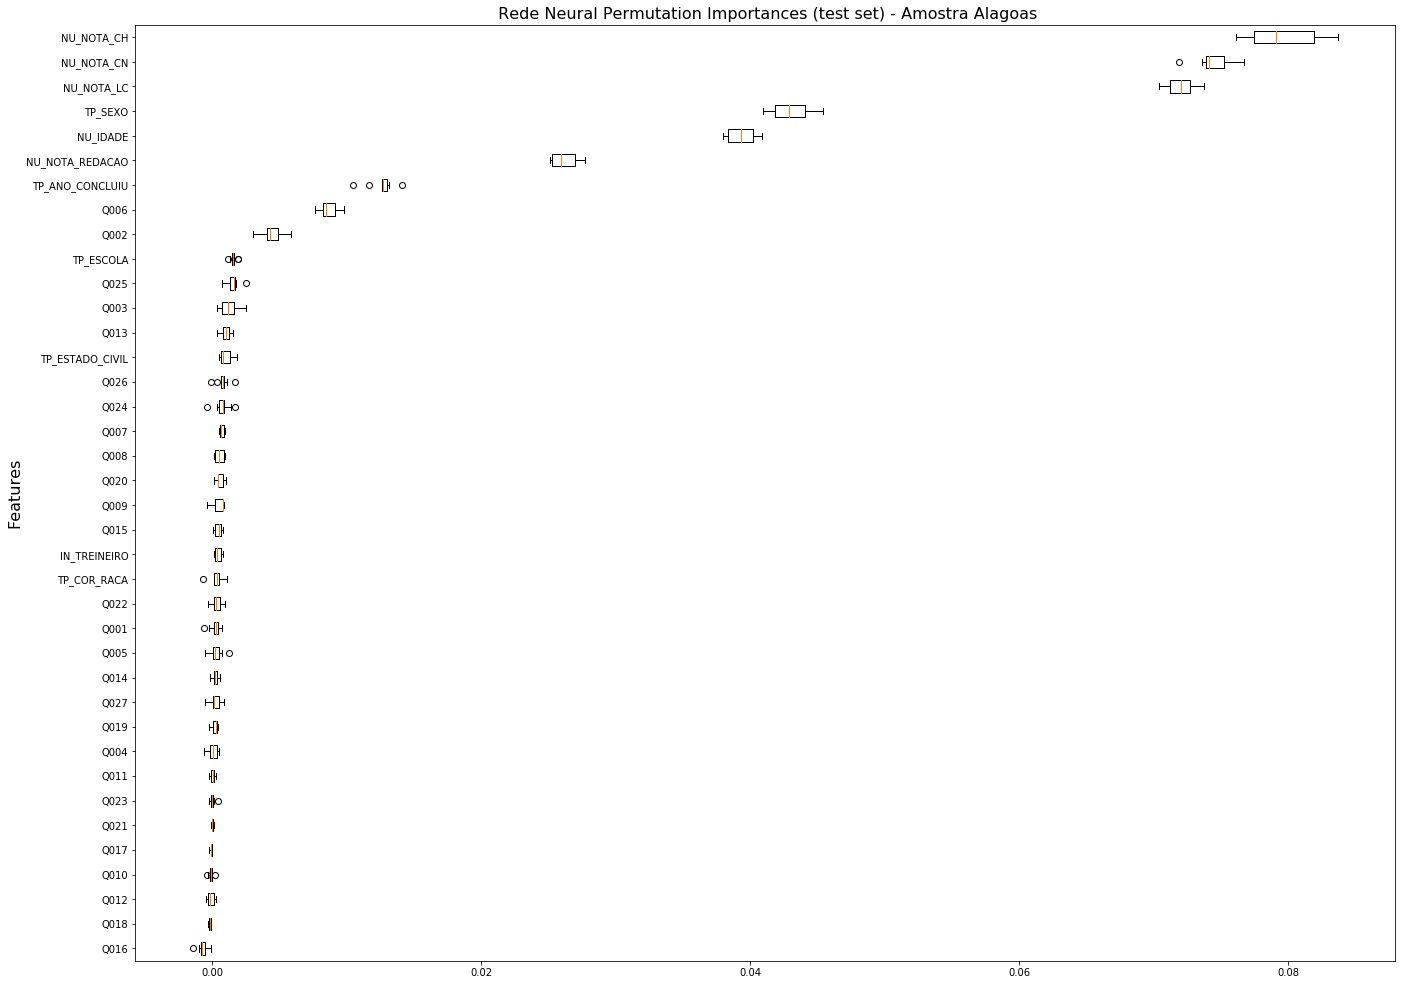

In [16]:
result = permutation_importance(rn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Rede Neural Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_RN_MT_AL.png', format='png')

plt.show()

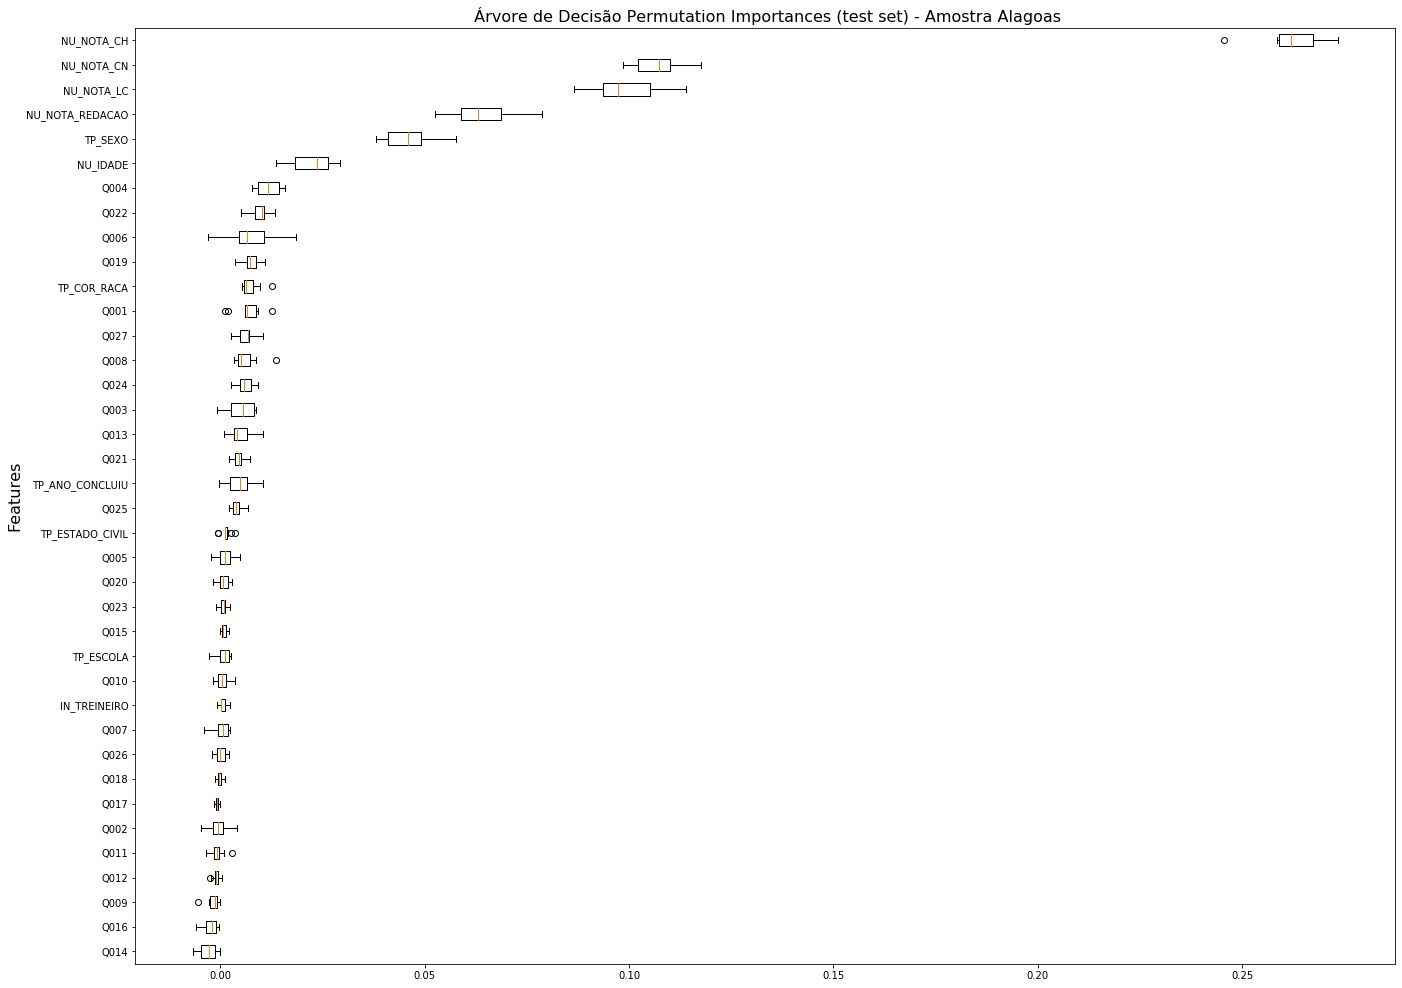

In [17]:
result = permutation_importance(dtree, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Árvore de Decisão Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_DT_MT_AL.png', format='png')

plt.show()